# 2020 Mexico Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this Analysis
- initial exploration of cleaned datasets for happiness and cases in Mexico
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated) 

## Load cleaned csv's into df

In [2]:
mexico_hap_filter = pd.read_csv('../data/cleaned_data/2020/mexico_hap_cleaned.csv')
mexico_cov=pd.read_csv('../data/cleaned_data/2020/mexico_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
mexico_hap_filter

,Unnamed: 0,date,week,mental_health_condition,age,gender,happiness_rating
0,1004,2020-04-27,week 2,No,20,Female,5.0
1,1005,2020-04-27,week 2,No,29,Female,8.0
2,1006,2020-04-27,week 2,No,69,Male,7.0
3,1007,2020-04-27,week 2,No,28,Female,6.0
4,1008,2020-04-27,week 2,No,51,Male,7.0
...,...,...,...,...,...,...,...
11003,12007,2020-09-24,week 12,No,20,Male,8.0
11004,12008,2020-09-24,week 12,No,24,Male,8.0
11005,12009,2020-09-24,week 12,No,64,Female,8.0
11006,12010,2020-09-24,week 12,No,24,Male,8.0


In [4]:
mexico_hap_filter.shape

(11008, 7)

In [5]:
# Get some information on the dataset and range
mexico_hap_filter['happiness_rating'].describe()

count    11008.000000
mean         6.840025
std          1.871867
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: happiness_rating, dtype: float64

<AxesSubplot:>

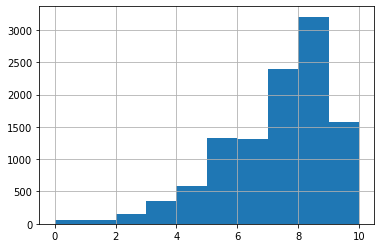

In [6]:
# Histogram to look at distribution
mexico_hap_filter['happiness_rating'].hist()

In [7]:
mexico_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,NaN,Mexico,23.6345,-102.5528,2020-01-22,0
1,1,NaN,Mexico,23.6345,-102.5528,2020-01-23,0
2,2,NaN,Mexico,23.6345,-102.5528,2020-01-24,0
3,3,NaN,Mexico,23.6345,-102.5528,2020-01-25,0
4,4,NaN,Mexico,23.6345,-102.5528,2020-01-26,0
...,...,...,...,...,...,...,...
312,312,NaN,Mexico,23.6345,-102.5528,2020-11-29,1107071
313,313,NaN,Mexico,23.6345,-102.5528,2020-11-30,1113543
314,314,NaN,Mexico,23.6345,-102.5528,2020-12-01,1122362
315,315,NaN,Mexico,23.6345,-102.5528,2020-12-02,1133613


In [8]:
mexico_cov.shape

(317, 7)

In [9]:
mexico_cov['cases'].describe()

count    3.170000e+02
mean     3.559110e+05
std      3.688014e+05
min      0.000000e+00
25%      3.844000e+03
50%      2.168520e+05
75%      6.764870e+05
max      1.144643e+06
Name: cases, dtype: float64

In [10]:
mexico_cov = mexico_cov[['date','cases']]
mexico_cov

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
312,2020-11-29,1107071
313,2020-11-30,1113543
314,2020-12-01,1122362
315,2020-12-02,1133613


### Group COVID-19 cases by date

In [11]:
mexico_cov['date'] = pd.to_datetime(mexico_cov['date'])

In [12]:
mexico_date_cov= mexico_cov.groupby('date').sum()
mexico_date_cov

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-11-29,1107071
2020-11-30,1113543
2020-12-01,1122362


Text(0, 0.5, 'Cases')

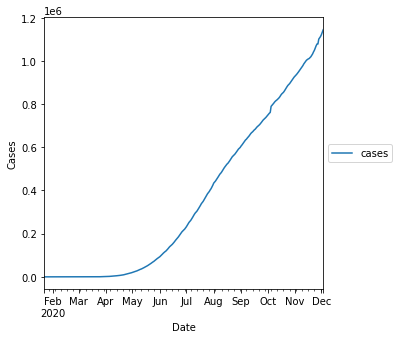

In [13]:
mexico_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations

Is Mexico still in their first wave/surge in cases? Going to have to look at daily changes plot to get a better idea because all this plot tells me is that it has just been increasing since May.

### Calculating daily changes in COVID-19 cases count

In [14]:
mexico_date_cov['daily_change'] = mexico_date_cov['cases'].diff()
mexico_date_cov

,cases,daily_change
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2020-11-29,1107071,5668.0
2020-11-30,1113543,6472.0
2020-12-01,1122362,8819.0


<AxesSubplot:xlabel='date'>

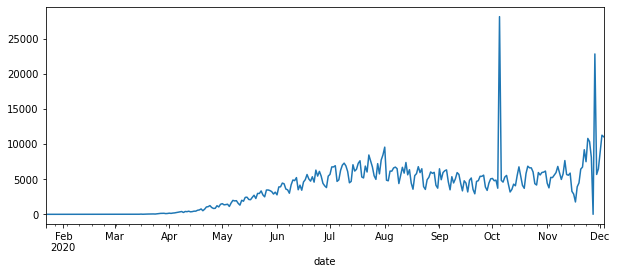

In [15]:
# plot of daily change in cases
mexico_date_cov['daily_change'].plot(figsize=(10,4))

### Observations
Different pattern of cases seen with Mexico. This plot tells me a lot more compared to cumulative cases plot. So in Mexico, they experienced a relatively later first wave (peaked in August) which declined but then had another surge in October and another in December.

In [16]:
mexico_date_cov.to_csv('../data/exported_subset_data/covid/covid_mexico.csv')

### Group happiness ratings by date

In [17]:
mexico_df=mexico_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [18]:
mexico_df

,date,happiness_rating
0,2020-01-06,7.166667
1,2020-01-08,7.000000
2,2020-02-06,7.500000
3,2020-02-09,6.606936
4,2020-03-06,6.454545
...,...,...
70,2020-11-06,7.050265
71,2020-11-07,7.080460
72,2020-11-08,7.000000
73,2020-12-06,6.394231


### Create new column with just month and year for date

In [19]:
mexico_df['month_year'] = pd.to_datetime(mexico_df['date']).dt.to_period('M')

In [20]:
mexico_df['date'] = pd.to_datetime(mexico_df['date'])

In [21]:
mexico_df

,date,happiness_rating,month_year
0,2020-01-06,7.166667,2020-01
1,2020-01-08,7.000000,2020-01
2,2020-02-06,7.500000,2020-02
3,2020-02-09,6.606936,2020-02
4,2020-03-06,6.454545,2020-03
...,...,...,...
70,2020-11-06,7.050265,2020-11
71,2020-11-07,7.080460,2020-11
72,2020-11-08,7.000000,2020-11
73,2020-12-06,6.394231,2020-12


## Happiness rating grouped by days vs. COVID-19 daily case changes

<AxesSubplot:label='96835e79-9b54-4449-8714-bcc8f231cc4a'>

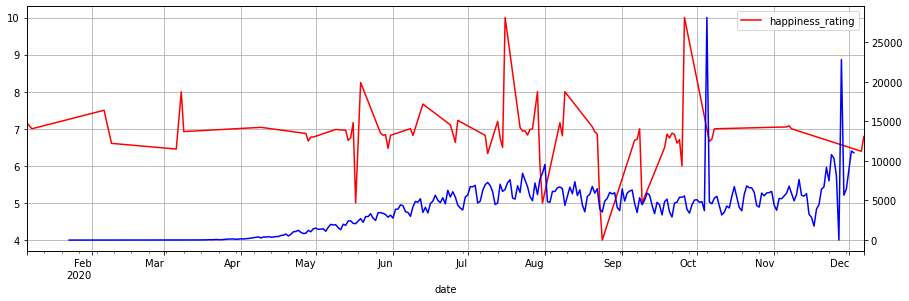

In [22]:
mexico_df.plot(x='date',y='happiness_rating', color='red',grid=True, figsize=(15,5))
mexico_date_cov['daily_change'].plot(color='blue', grid=True, secondary_y=True)

### Observations

A little difficult to look at. Notable points are the peak mid-July, low-point close to September, and peak in October. For cases, seems to have a peak around August, major peak in October, and peak in December. Going to make a smoother line plot to make some correlations.

In [23]:
mexico_df.groupby('month_year')['happiness_rating'].mean()

month_year
2020-01    7.083333
2020-02    7.053468
2020-03    7.126770
2020-04    6.827604
2020-05    6.804738
2020-06    7.047850
2020-07    6.956060
2020-08    6.475051
2020-09    6.812187
2020-10    6.793943
2020-11    7.043575
2020-12    6.591852
Freq: M, Name: happiness_rating, dtype: float64

### Merge happiness and COVID-19 cases into one df

In [24]:
merged_df= pd.merge(left=mexico_df, left_on='date',
         right=mexico_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-06,7.500000,2020-02,0,0.0
1,2020-02-09,6.606936,2020-02,0,0.0
2,2020-03-06,6.454545,2020-03,6,1.0
3,2020-03-08,8.000000,2020-03,7,1.0
4,2020-03-09,6.925764,2020-03,7,0.0
...,...,...,...,...,...
66,2020-10-07,6.724138,2020-10,799188,4580.0
67,2020-10-08,7.000000,2020-10,804488,5300.0
68,2020-11-06,7.050265,2020-11,955128,5931.0
69,2020-11-07,7.080460,2020-11,961938,6810.0


In [25]:
merged_df['month_year'] = pd.to_datetime(merged_df['date']).dt.to_period('M')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-06,7.500000,2020-02,0,0.0
1,2020-02-09,6.606936,2020-02,0,0.0
2,2020-03-06,6.454545,2020-03,6,1.0
3,2020-03-08,8.000000,2020-03,7,1.0
4,2020-03-09,6.925764,2020-03,7,0.0
...,...,...,...,...,...
66,2020-10-07,6.724138,2020-10,799188,4580.0
67,2020-10-08,7.000000,2020-10,804488,5300.0
68,2020-11-06,7.050265,2020-11,955128,5931.0
69,2020-11-07,7.080460,2020-11,961938,6810.0


### Monthly COVID-19 cases plotted with monthly happiness rating means

<AxesSubplot:label='f695c093-78f8-43cb-9cee-796af51fb639'>

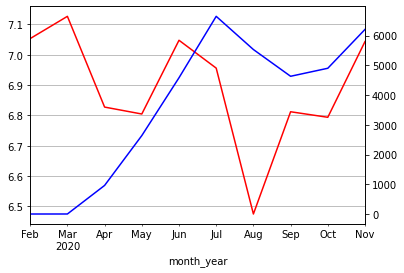

In [26]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations

Potentially a lag? August dip in happiness on red line that shortly followed the surge/peak in cases seen by the blue line. Similar pattern seen in September and October, but happiness seems to be increasing or potentially average out to a higher mean.

### Weekly COVID-19 

In [27]:
weekly_covid= mexico_date_cov.rolling(7).mean()

<AxesSubplot:label='77b35194-726f-475e-8287-d9034f4822a9'>

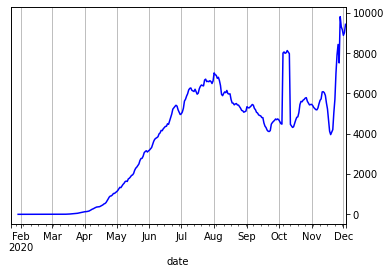

In [28]:
## generate weekly covid plot to pair with interpolated rolling happiness plot
weekly_covid['daily_change'].plot(color='blue', grid=True, secondary_y=True)

## Interpolated Happiness Ratings

In [29]:
mexico_df_daily=mexico_df.set_index(pd.to_datetime(mexico_df['date']))

In [30]:
mexico_df_daily=mexico_df_daily[['date', 'happiness_rating']]

In [31]:
mexico_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_mexico.csv')

<AxesSubplot:label='862fe1fb-b798-401e-8d65-799994a27414'>

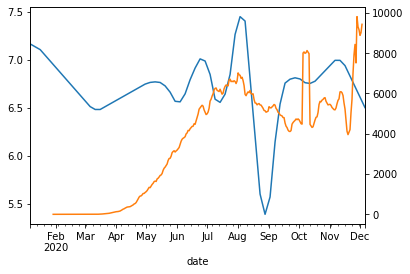

In [32]:
## resample, interpolate, rolling mean 
## combine with weekly covid plot
mexico_df_daily.resample('5D').interpolate().rolling('14D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations
Maybe a delayed response? Dip in happiness in September that occurs after peak surge in August for cases. Another small dip in October when the second surge was seen. 

## Happiness rating mean for 2020 as a whole in Mexico

In [33]:
mexico_hap_filter['happiness_rating'].mean()

6.840025436046512

Mexico's happiness rating in 2019 was 6.43. Slight increase! Wow, so while Denmark, Finland, US, etc. have seen decrease in happiness ratings, Mexico has an increase. Mexico did have a much later later first wave...could this be a contributing factor?